# Solución del examen 1

## Examen A

### Punto 1:

In [1]:
# Importing libraries
from numpy import loadtxt, zeros
from pylab import plot, xlabel, ylabel, show, legend, grid, xlim

In [2]:
solman = loadtxt("../data/sunspots.txt", float)

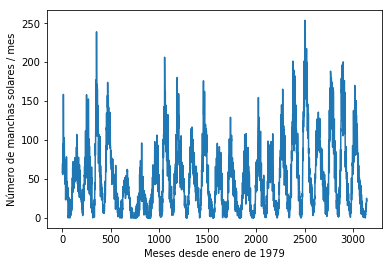

In [3]:
plot(solman[:,0], solman[:,1])
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

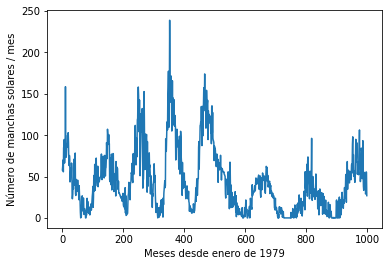

In [4]:
nm = 1000 # Número de meses

plot(solman[0:nm,0], solman[0:nm,1])
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

Calculando el promedio usando la expresión:
    \begin{equation}
        Y_k = \frac{1}{2r+1} \sum^{r}_{m=-r}{y_{k+m}}
    \end{equation}

In [5]:
r = 5 # Número de meses sobre los que se promedia

y_prom = zeros(nm, float)
norm = 2*r + 1

for k in range( nm ):
    for m in range( -r, r+1 ):
        y_prom[k] += solman[(k+5)+m,1]
    y_prom[k] /= norm

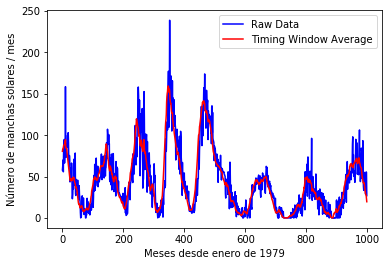

In [6]:
plot(solman[0:nm,0], solman[0:nm,1], 'b-', label="Raw Data")
plot(solman[0:nm, 0], y_prom, 'r-', label="Timing Window Average")
legend()
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

### Punto 2:

- Se define la función binomial

In [7]:
def binomial(n, k):
    n_fact = 1
    k_fact = 1
    nk_fact = 1

    if k == 0 or k==n:
        coef = 1
    else:
        for i in range( int(n), 0, -1 ):
            n_fact *= i
        for j in range( int(k), 0, -1 ):
            k_fact *= j
        for l in range( int(n-k), 0, -1 ):
            nk_fact *= l
        
        coef = n_fact / (k_fact*nk_fact)
            
    return( int(coef) )

- Se llama la función binomial para el caso n = 100 y k = 60

In [8]:
lanz = 100
cab = 60
print("La probabilidad de obtener 60 veces cara en 100 lanzamientos es: %0.1f" % (binomial(lanz, cab)*0.5**lanz*100), "%" )

La probabilidad de obtener 60 veces cara en 100 lanzamientos es: 1.1 %


- La probabilidad de obtener más de 60 veces cara en 100 lanzamientos es la suma de las probabilidades

In [9]:
prob60 = 0.
for i in range(60, 101):
    prob60 += binomial(lanz, i)*0.5**lanz

print("La probabilidad de obtener más de 60 veces cara en 100 lanzamientos es: %0.1f" % (prob60*100), "%" )

La probabilidad de obtener más de 60 veces cara en 100 lanzamientos es: 2.8 %


## Examen B

In [10]:
from math import pi, sqrt, sin, cos
from pylab import imshow

- Características generales

In [11]:
np = 1.e3 # Número de puntos por eje
size = 120. # cm
res = size/np # Resolución cm/puntos
lmda = 8.3e-7 # cm
k = 2*pi/lmda

A1 = 1.0 # cm
A2 = 1.0 # cm

d_hole = 0.015 # cm, Separació entre los agujeros

# Posición de los agujeros
x_hole1 = 0. # cm
y_hole1 = size/2. - d_hole/2. # cm

x_hole2 = 0. # cm
y_hole2 = size/2. + d_hole/2. # cm

- Calculando la sumatoria de ondas en la pared y guardando los datos en el archivo *difraction.dat*

In [12]:
x = zeros(int(np), float) # 
y = zeros(int(np), float) # Paralela a este eje se ubica la pantalla y la pared

for i in range(int(np)):
    x[i] = res*i # Distancias
    y[i] = res*i
    
ondas = open("difraction.dat", "w")

deltaX1 = size - x_hole1
deltaX2 = size - x_hole2

for j in range( len(y) ):
    
    deltaY1 = y[j] - y_hole1
    r1 = sqrt( deltaX1*deltaX1 + deltaY1*deltaY1 ) # Posición para onda 1
    
    deltaY2 = y[j] - y_hole2
    r2 = sqrt( deltaX2*deltaX2 + deltaY2*deltaY2 ) # Posición para onda 2
    
    zita1 = A1*cos(k*r1)
    zita2 = A2*cos(k*r2)
    ondas.write( "%0.1f %0.1f" % ( y[j], (zita1+zita2)*(zita1+zita2) ) )
    ondas.write("\n")
    
ondas.close()

- Gráficando la magnitud de la onda total en la pared

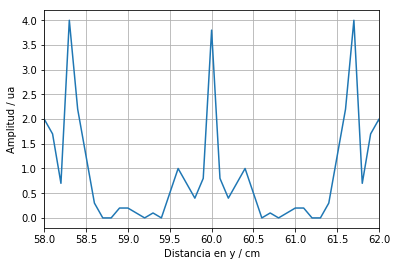

In [13]:
data = loadtxt("difraction.dat", float)
plot(data[:,0], data[:,1]) #, origin="lower", extent=[0, 100, 0, 100])
xlabel("Distancia en y / cm")
ylabel("Amplitud / ua")
xlim(58,62)
grid("on")
show()

- La estimación análitica corresponde a:
\begin{equation}
    I = I_0\cos\left( \frac{\pi d_h}{\lambda}\sin(\theta) \right)\, ,
\end{equation}
donde $I_0=A^2$, y $\sin(\theta) = y / r$, con $r$ la distancia entre el punto medio de los puntos y la posisición $y$

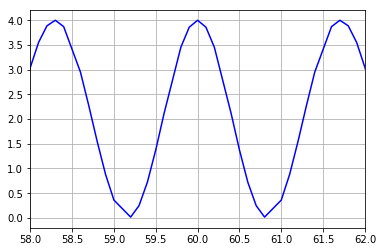

In [14]:
y_a = zeros(len(data[:,0]), float)

for i in range( len(data[:,0]) ):
    tmp_0 = data[i,0] - size/2.
    r = sqrt(size*size + tmp_0*tmp_0)
    tmp = cos( ((pi*d_hole) / lmda) * ( tmp_0/r) )
    y_a[i] = (A1+A2)**2 * tmp*tmp
    

plot(data[:,0], y_a, 'b-')
xlim(58,62)
grid("on")
show()

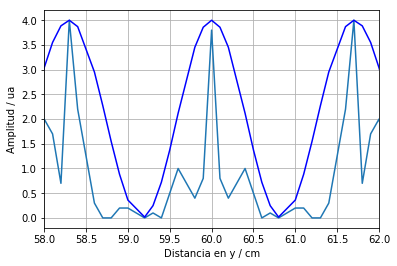

In [15]:
data = loadtxt("difraction.dat", float)
plot(data[:,0], data[:,1]) #, origin="lower", extent=[0, 100, 0, 100])
plot(data[:,0], y_a, 'b-')
xlabel("Distancia en y / cm")
ylabel("Amplitud / ua")
xlim(58,62)
grid("on")
show()